등록 현황 -> 그래프
불법주정차 -> 분포

주차장 -> 맵핑
-> 민영, 공영 비교
-> 주차비용

불법주차 다발 지역 - 주차장 분포

In [9]:
df = pd.read_csv('./서울시자동차등록현황.csv')

df= df.drop(0)
df = df.set_index("자치구별")
print(df)

df_t = df.transpose()
#print(df_t) #역순으로 출력

        2000    2005    2010    2015    2020    2021    2022
자치구별                                                        
종로구    55174   57001   53043   53031   53472   53339   53098
중구     56619   53398   62836   56470   54841   63506   60758
용산구    64335   74257   81514   83496   87636   88363   82765
성동구    78922   89751   90979   98329  104962  102131  101907
광진구    89113   91202   94698   99183  100774  100915  101583
동대문구   82441   90799   95106  102996  106231  107187  108327
중랑구    91090   96525  103258  111936  116603  117311  119241
성북구    93099  108492  123315  127190  131711  130222  132072
강북구    65993   76483   80318   84325   85754   81003   81400
도봉구    76403   87645   89883   93388   94279   92946   92600
노원구   128509  139545  146241  147747  147426  147653  148210
은평구    93431  104675  115729  128342  135193  134628  165549
서대문구   79413   80887   80496   84648   91857   89819   92192
마포구    88768  101400  108045  116054  119639  121467  118022
양천구   108350  128813  13

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

In [25]:
data = {'District': ['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu', 'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu', 'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu', 'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
        '2000': [55174, 56619, 64335, 78922, 89113, 82441, 91090, 93099, 65993, 76403, 128509, 93431, 79413, 88768, 108350, 110662, 84234, 55091, 101472, 82843, 99223, 128749, 186168, 161085, 113262],
        '2005': [57001, 53398, 74257, 89751, 91202, 90799, 96525, 108492, 76483, 87645, 139545, 104675, 80887, 101400, 128813, 139479, 103482, 63110, 121287, 94488, 116240, 144840, 212393, 167522, 116759],
        '2010': [53043, 62836, 81514, 90979, 94698, 95106, 103258, 123315, 80318, 89883, 146241, 115729, 80496, 108045, 138019, 158121, 114445, 66583, 127671, 98034, 122310, 154204, 215398, 196836, 130439],
        '2015': [53031, 56470, 83496, 98329, 99183, 102996, 111936, 127190, 84325, 93388, 147747, 128342, 84648, 116054, 143945, 175903, 128294, 75325, 134955, 106116, 128081, 169230, 221867, 205698, 131858],
        '2020': [53472, 54841, 87636, 104962, 100774, 106231, 116603, 131711, 85754, 94279, 147426, 135193, 91857, 119639, 151129, 187762, 133120, 83335, 137754, 110369, 128471, 168678, 221196, 226800, 144860],
        '2021': [53339, 63506, 88363, 102131, 100915, 107187, 117311, 130222, 81003, 92946, 147653, 134628, 89819, 121467, 146724, 188972, 132388, 83959, 139838, 111350, 123707, 166138, 220975, 227035, 147977],
        '2022': [53098, 60758, 82765, 101907, 101583, 108327, 119241, 132072, 81400, 92600, 148210, 165549, 92192, 118022, 144059, 190859, 133973, 86298, 136451, 109862, 124549, 165969, 227803, 230070, 148961]
}

df = pd.DataFrame(data)
df

,District,2000,2005,2010,2015,2020,2021,2022
0,Jongno-gu,55174,57001,53043,53031,53472,53339,53098
1,Jung-gu,56619,53398,62836,56470,54841,63506,60758
2,Yongsan-gu,64335,74257,81514,83496,87636,88363,82765
3,Seongdong-gu,78922,89751,90979,98329,104962,102131,101907
4,Gwangjin-gu,89113,91202,94698,99183,100774,100915,101583
5,Dongdaemun-gu,82441,90799,95106,102996,106231,107187,108327
6,Jungnang-gu,91090,96525,103258,111936,116603,117311,119241
7,Seongbuk-gu,93099,108492,123315,127190,131711,130222,132072
8,Gangbuk-gu,65993,76483,80318,84325,85754,81003,81400
9,Dobong-gu,76403,87645,89883,93388,94279,92946,92600


<Figure size 10000x15000 with 0 Axes>

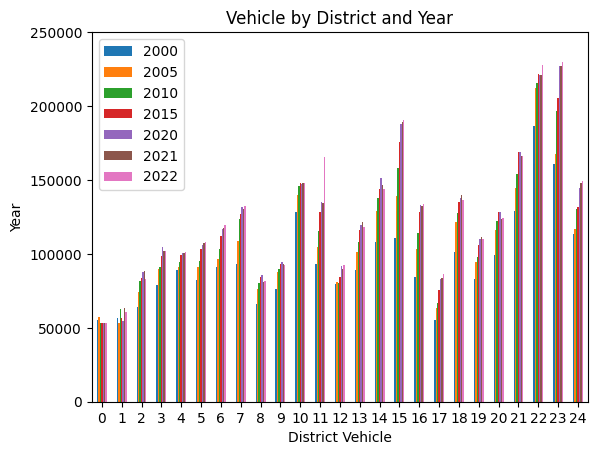

<Figure size 10000x15000 with 0 Axes>

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
# df.plot()
# plt.title("Pandas의 Plot메소드 사용 예")
# plt.xlabel("시간")
# plt.ylabel("Data")
# plt.show()
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
ticklabel=['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu', 'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu', 'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu', 'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu']
plt.figure(figsize=(10, 20))
df.plot.bar()
plt.title("Vehicle by District and Year")
plt.xlabel("District Vehicle")
plt.ylabel("Year")
plt.xticks(x,ticklabel)
plt.ylim(0, 250000)


In [ ]:
register_data=pd.read_csv("서울시자동차등록현황.csv")
import matplotlib as mpl

import matplotlib.pyplot as plt
#window 한글폰트 설정
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
register_last.astype(float).plot(figsize=(10,8),fontsize=8, color='limegreen')
register_df.plot()

        2000    2005    2010    2015    2020    2021    2022
자치구별                                                        
종로구    55174   57001   53043   53031   53472   53339   53098
중구     56619   53398   62836   56470   54841   63506   60758
용산구    64335   74257   81514   83496   87636   88363   82765
성동구    78922   89751   90979   98329  104962  102131  101907
광진구    89113   91202   94698   99183  100774  100915  101583
동대문구   82441   90799   95106  102996  106231  107187  108327
중랑구    91090   96525  103258  111936  116603  117311  119241
성북구    93099  108492  123315  127190  131711  130222  132072
강북구    65993   76483   80318   84325   85754   81003   81400
도봉구    76403   87645   89883   93388   94279   92946   92600
노원구   128509  139545  146241  147747  147426  147653  148210
은평구    93431  104675  115729  128342  135193  134628  165549
서대문구   79413   80887   80496   84648   91857   89819   92192
마포구    88768  101400  108045  116054  119639  121467  118022
양천구   108350  128813  13

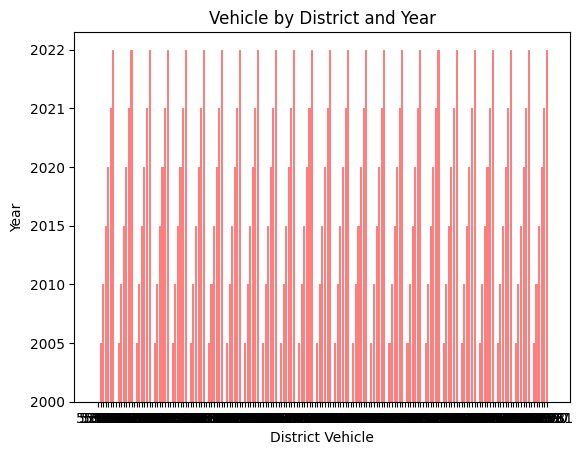

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# font_name = mpl.font_manager.FontProperties(fname='').get_name()
# mpl.rc('font', family=font_name)

df = pd.read_csv('./서울시자동차등록현황.csv')

df= df.drop(0)
df = df.set_index("자치구별")
#print(df)

df_t = df.transpose()
#print(df_t)

# Separate the data into years and districts
years = df.columns
districts = df.index

# Create a line graph for each district
for district in districts:
    data = df.loc[district]
    # plt.plot(years, data)
    
    plt.bar(data, years, 

        color='red', # color
        width=-0.8,
        alpha=0.5) # transparency

plt.xlabel('District Vehicle')
plt.ylabel('Year')
plt.title('Vehicle by District and Year')
plt.show()